In [12]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import matplotlib as mpl
import seaborn.apionly as sns
%matplotlib inline

In [19]:
sns.set_context('poster')

In [20]:
df = pd.read_csv('results/loglike_tests_2.csv')

In [21]:
df.iloc[2::4].log_like = df.iloc[2::4].log_like.values - df.iloc[1::4].log_like.values

/Users/bcook/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
df

,N_scale,full_MIST,like_mode,log_like,lum_cut
0,128,True,0,-741610.0,inf
1,128,True,1,-6819.2,inf
2,128,True,2,-8134.8,inf
3,128,True,3,-703850.0,inf
4,128,True,0,-707270.0,inf
5,128,True,1,-3869.2,inf
6,128,True,2,-28858.8,inf
7,128,True,3,-672950.0,inf
8,128,True,0,-786730.0,inf
9,128,True,1,-9561.6,inf


In [23]:
df.lum_cut.unique()

array([   inf,  1000.,   300.,   100.,    30.,    10.,     3.])

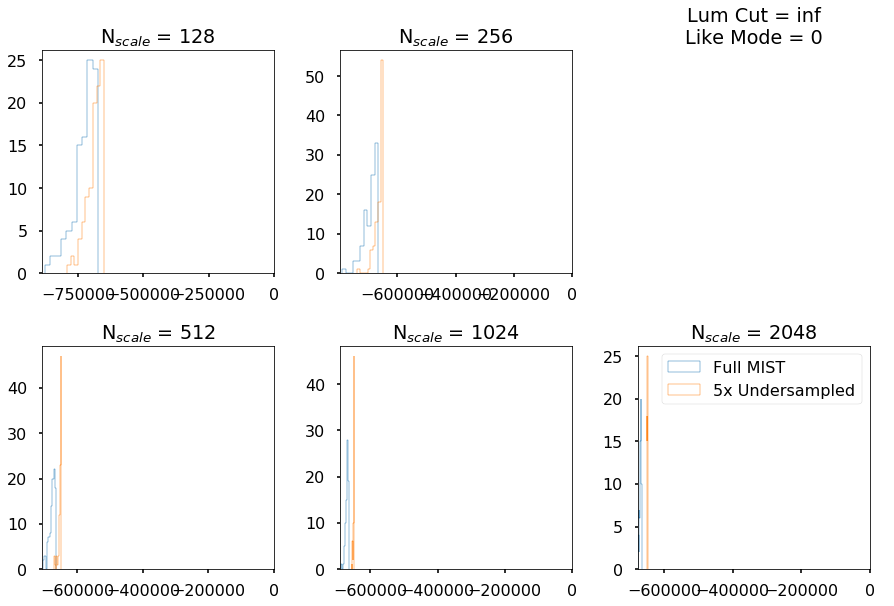

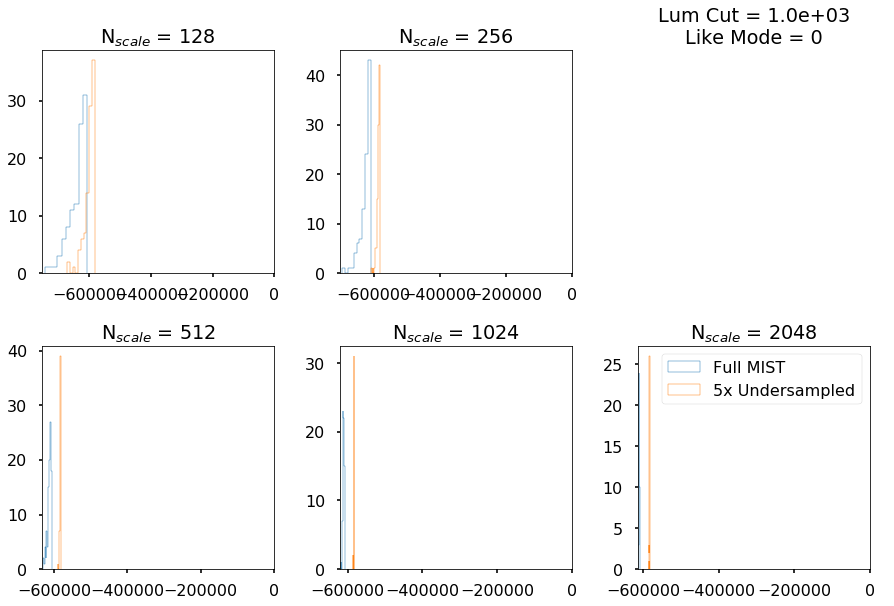

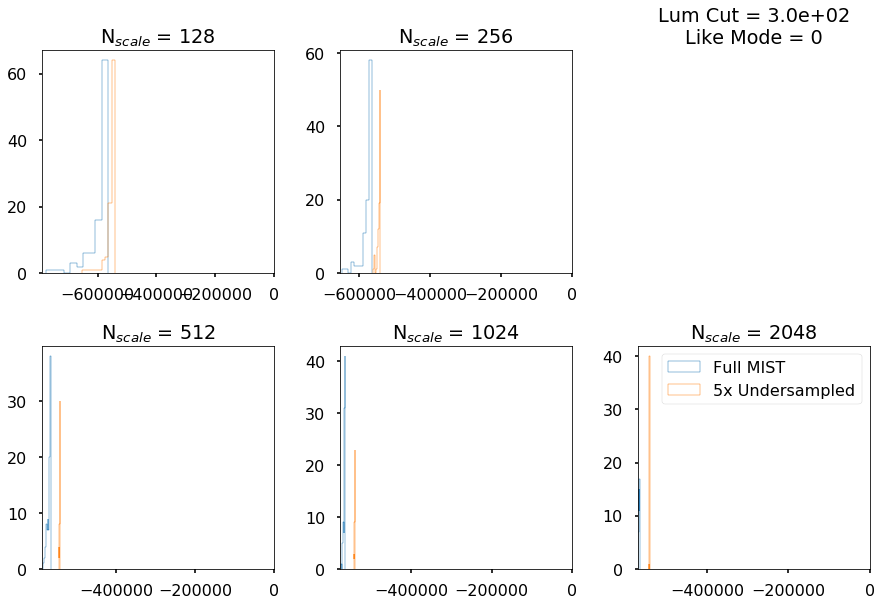

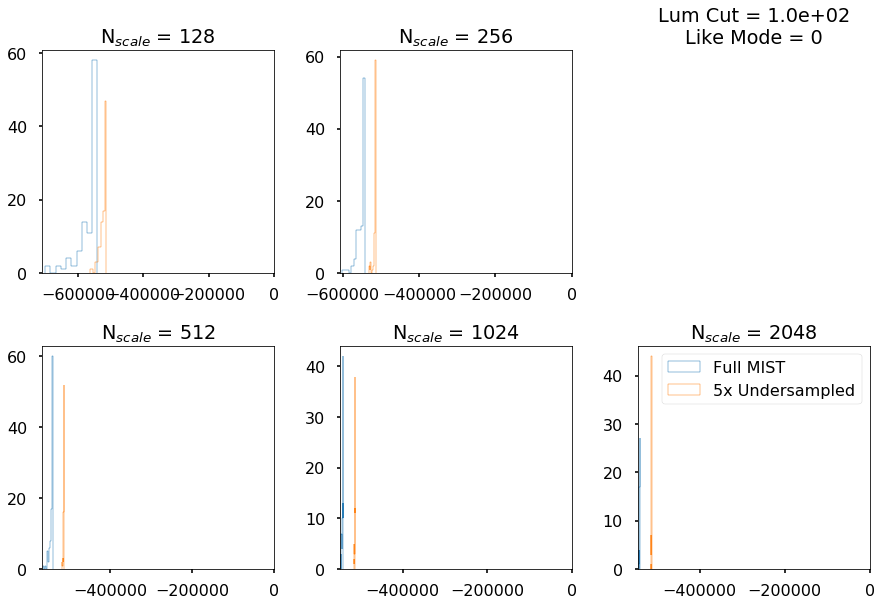

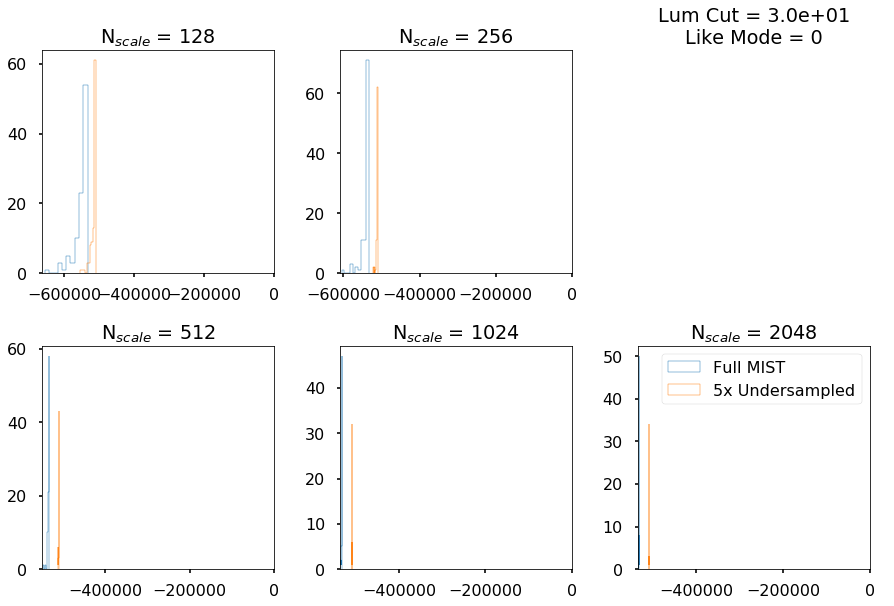

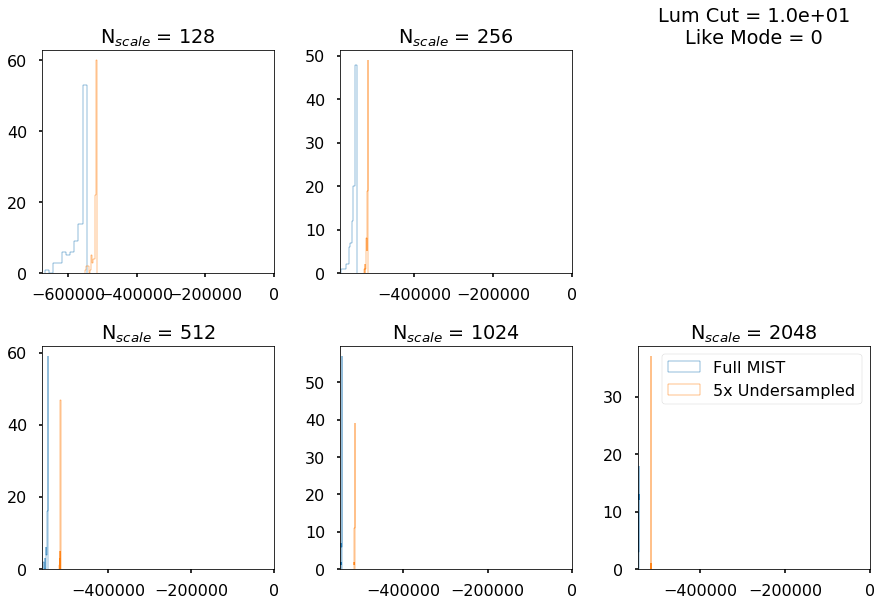

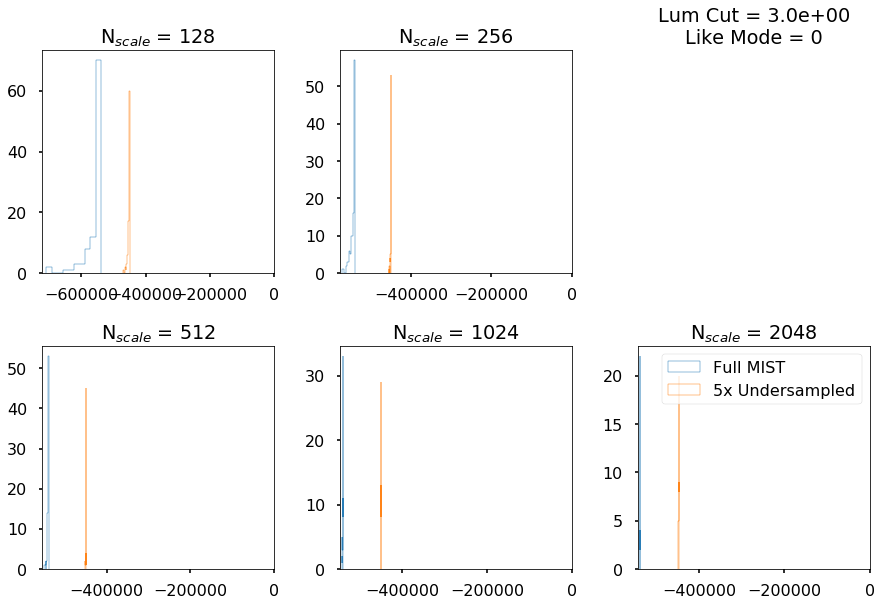

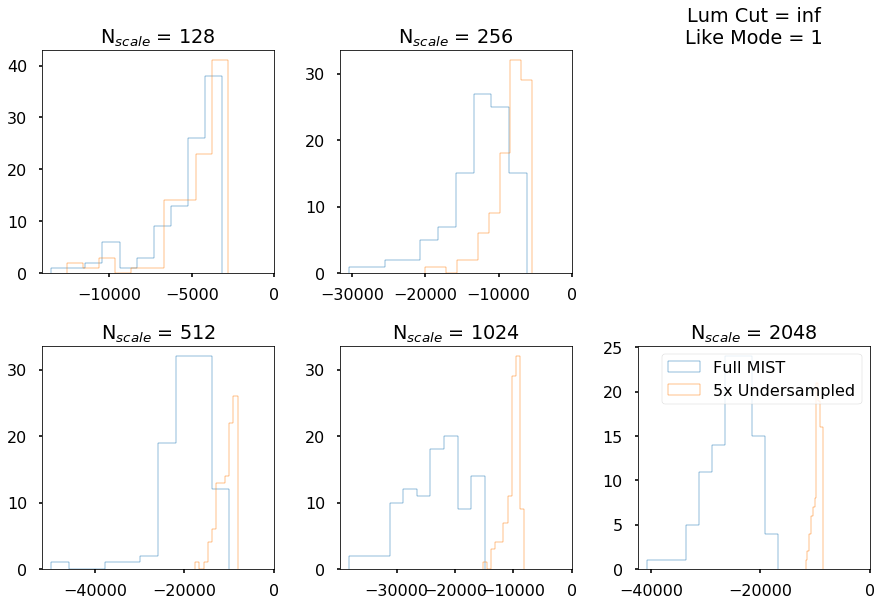

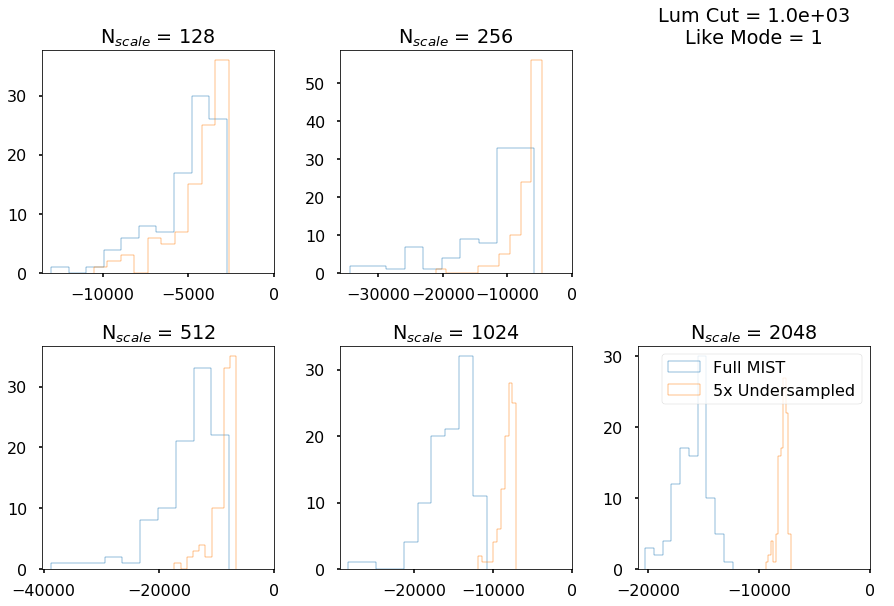

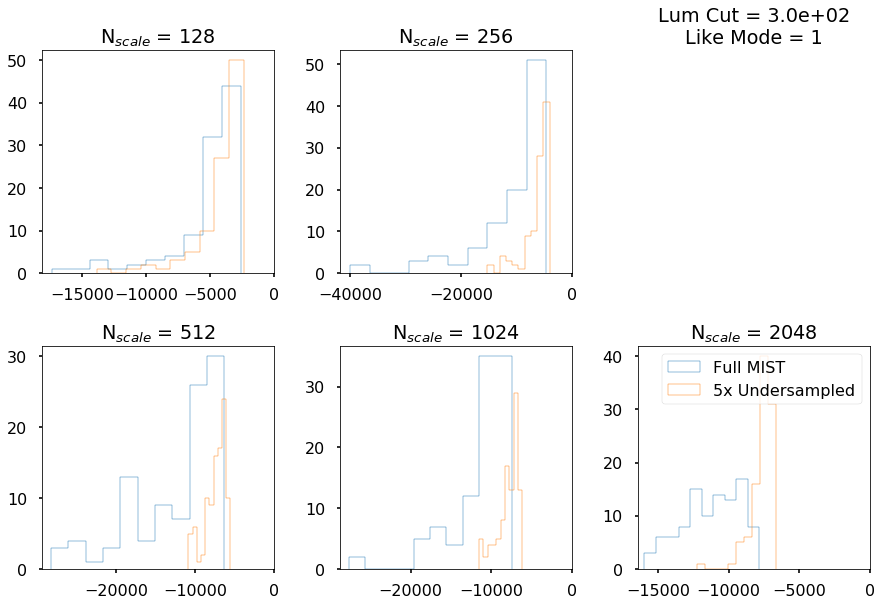

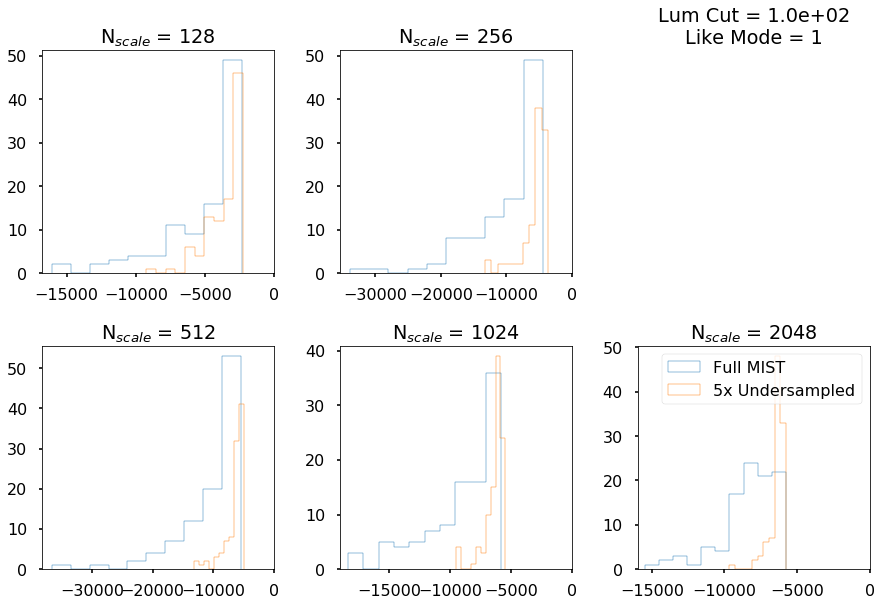

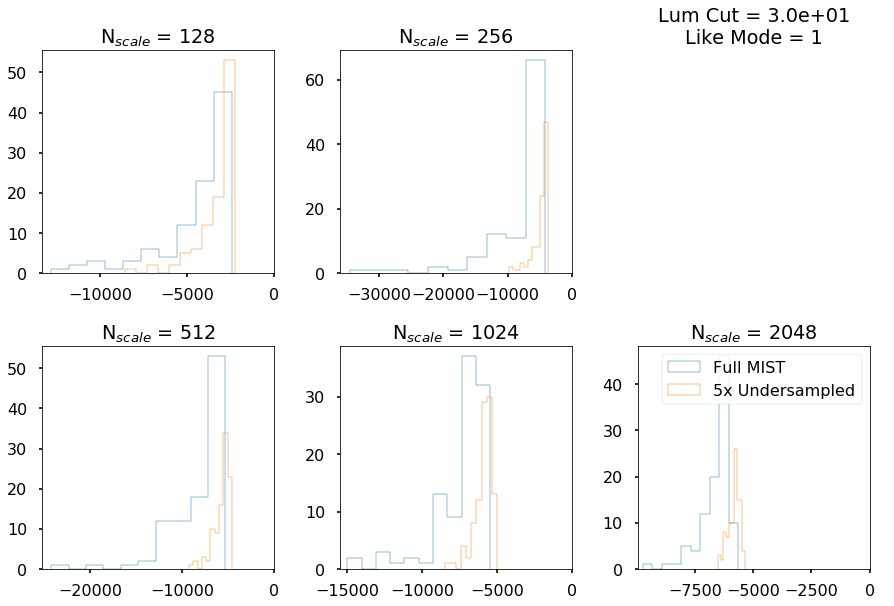

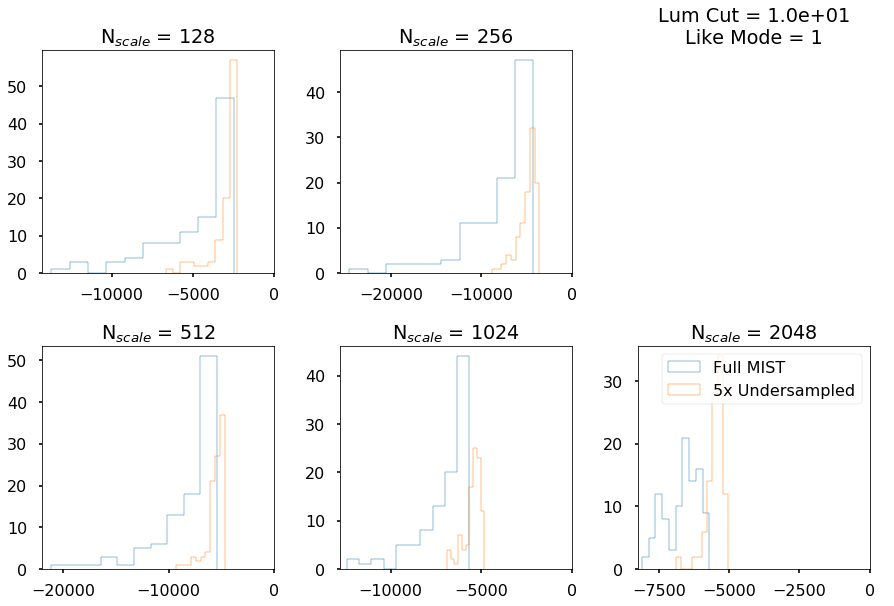

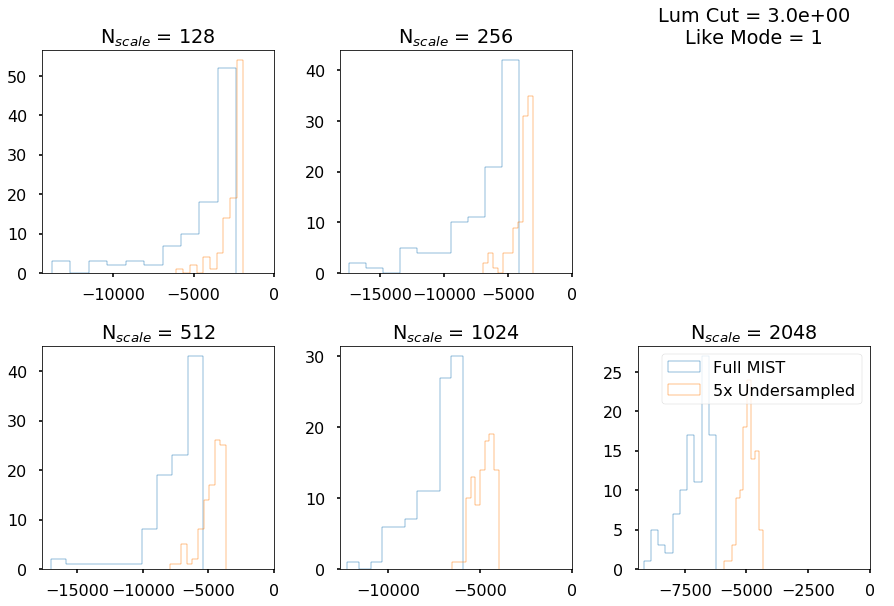

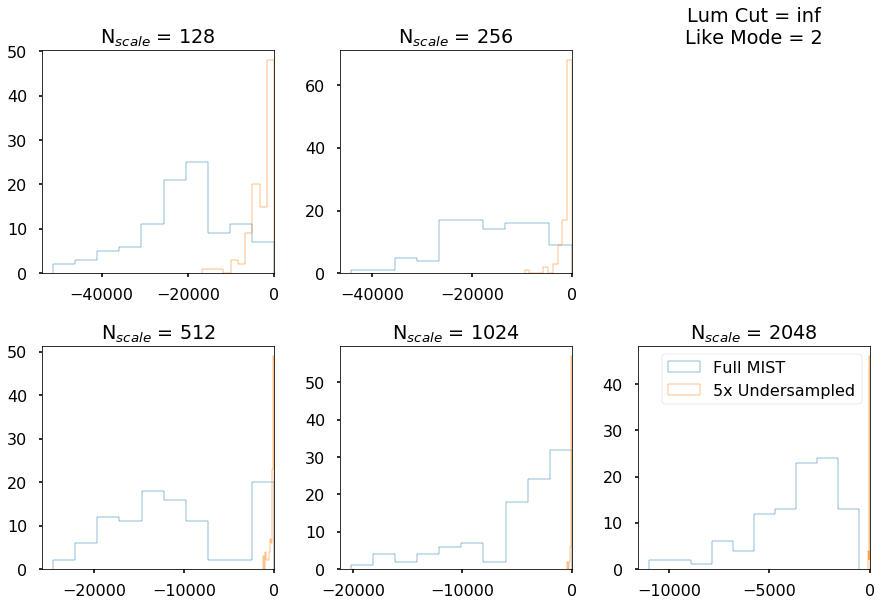

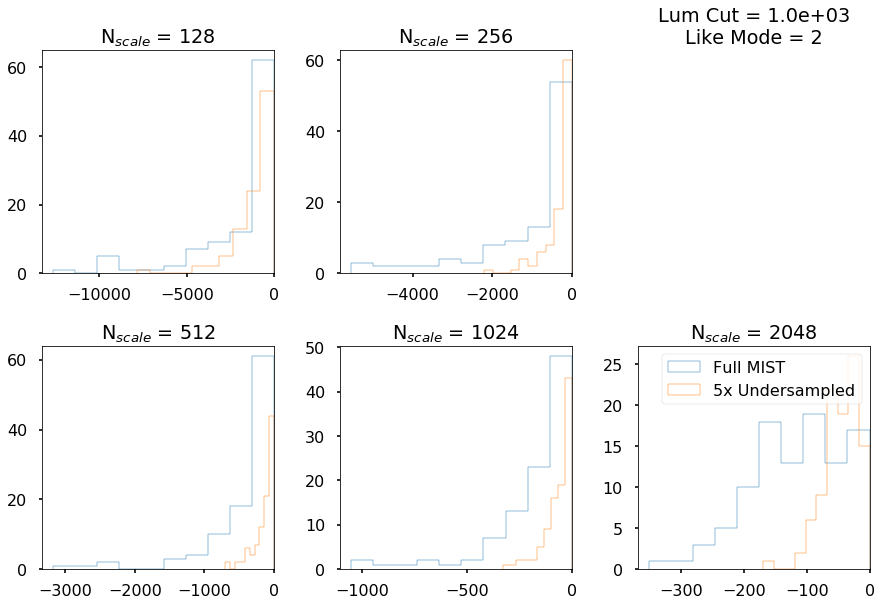

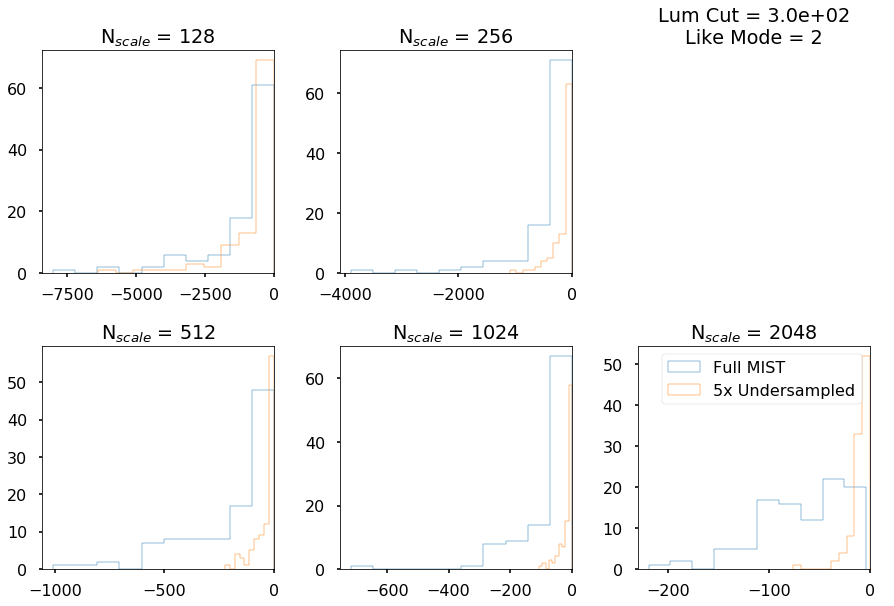

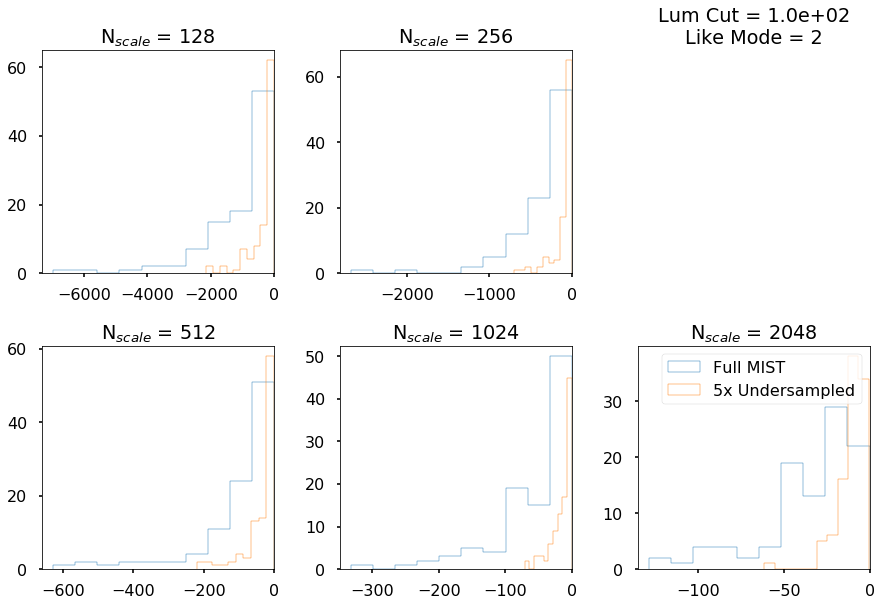

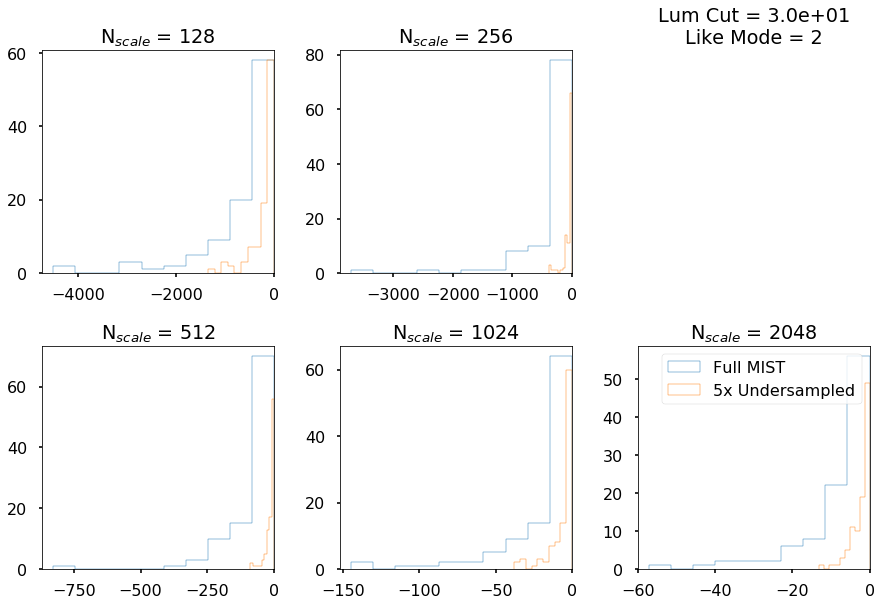

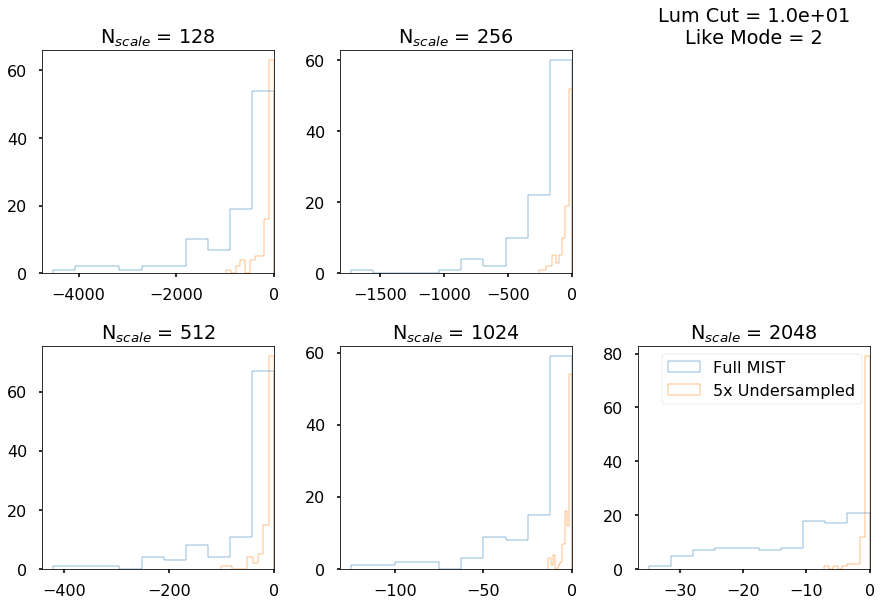

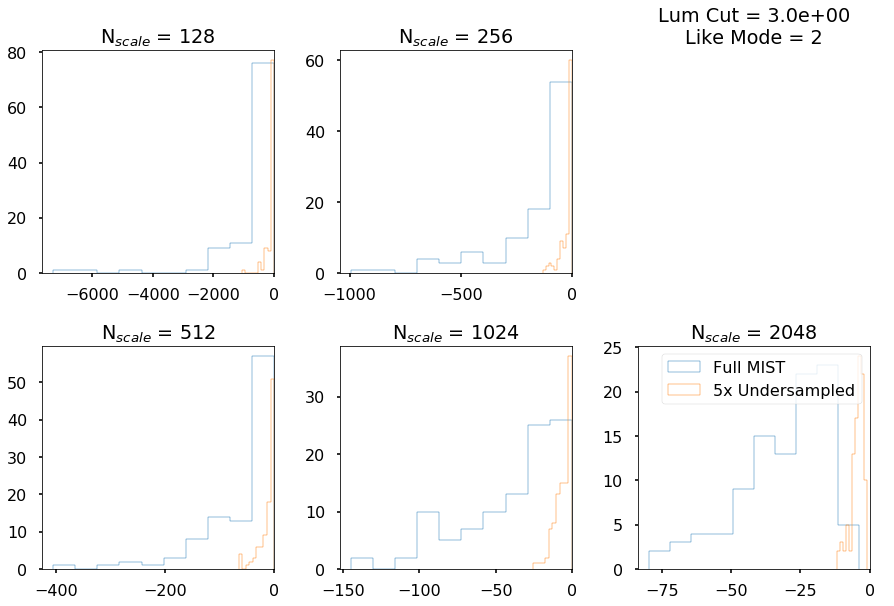

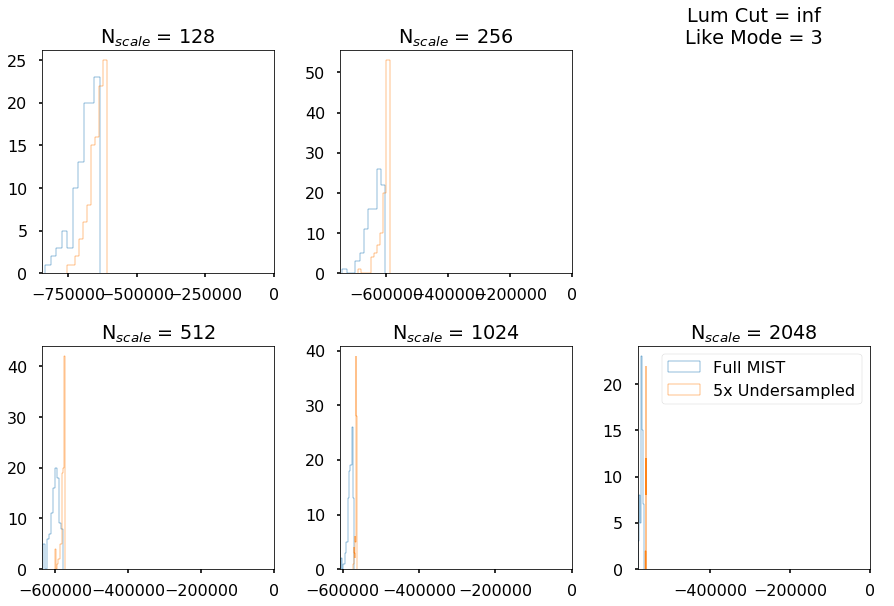

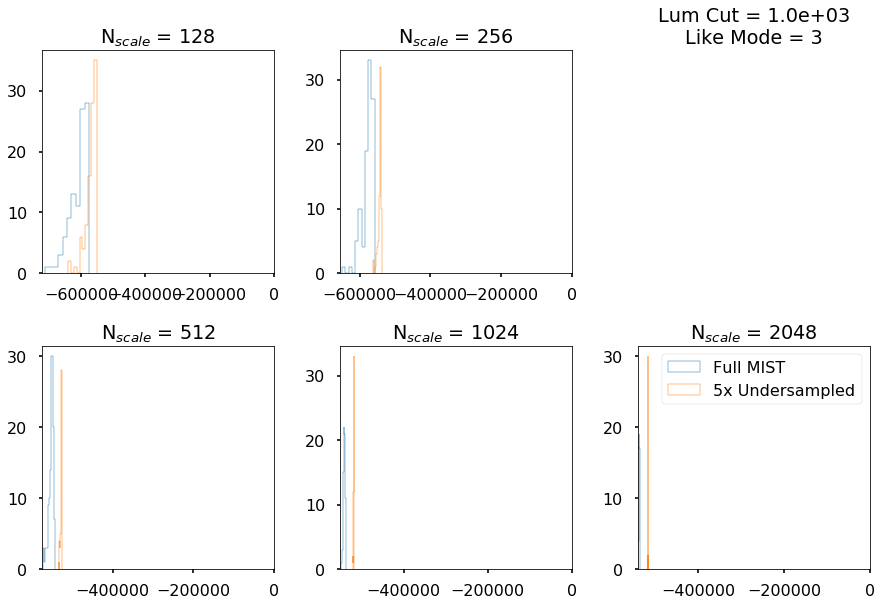

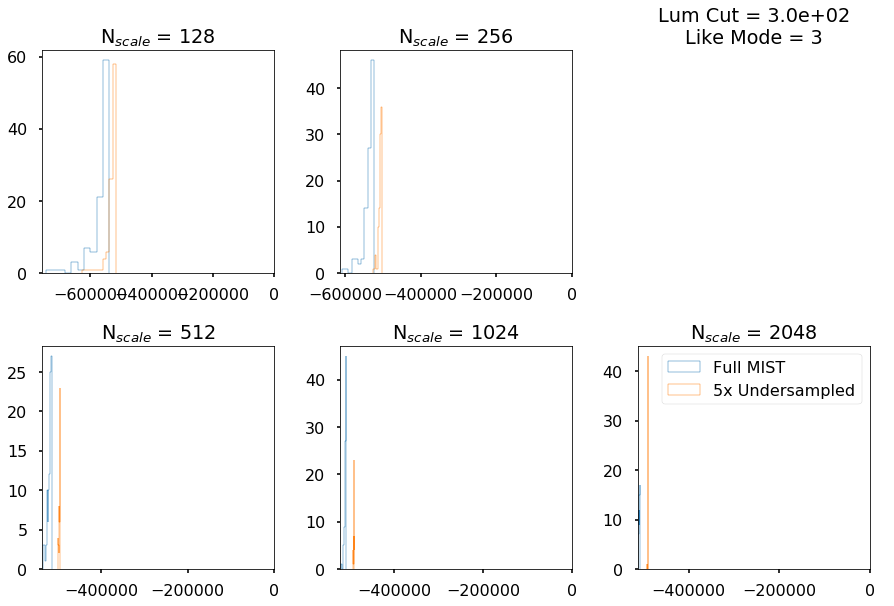

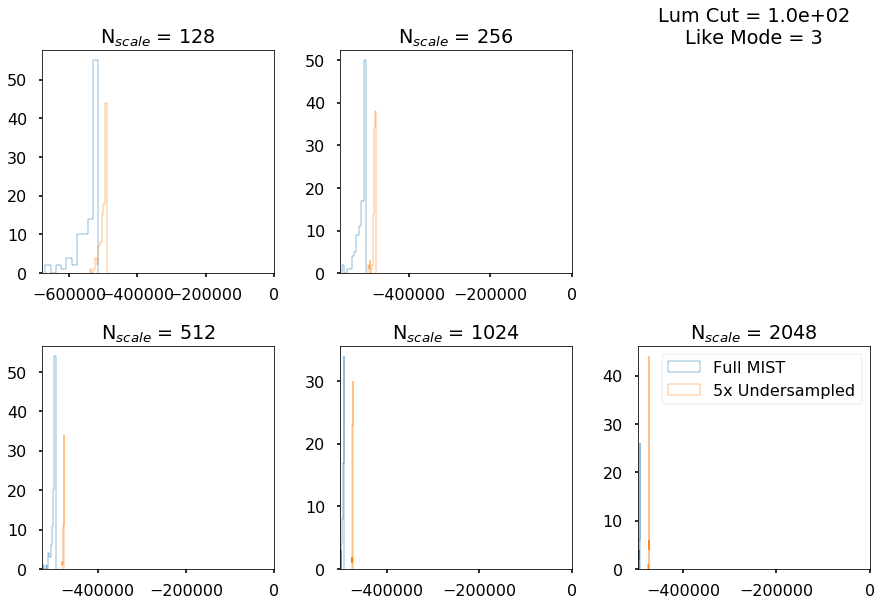

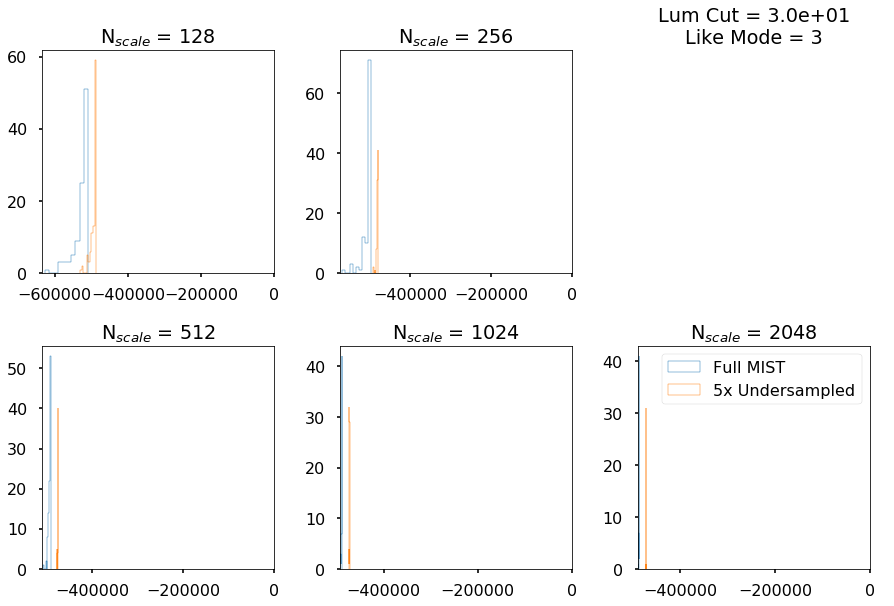

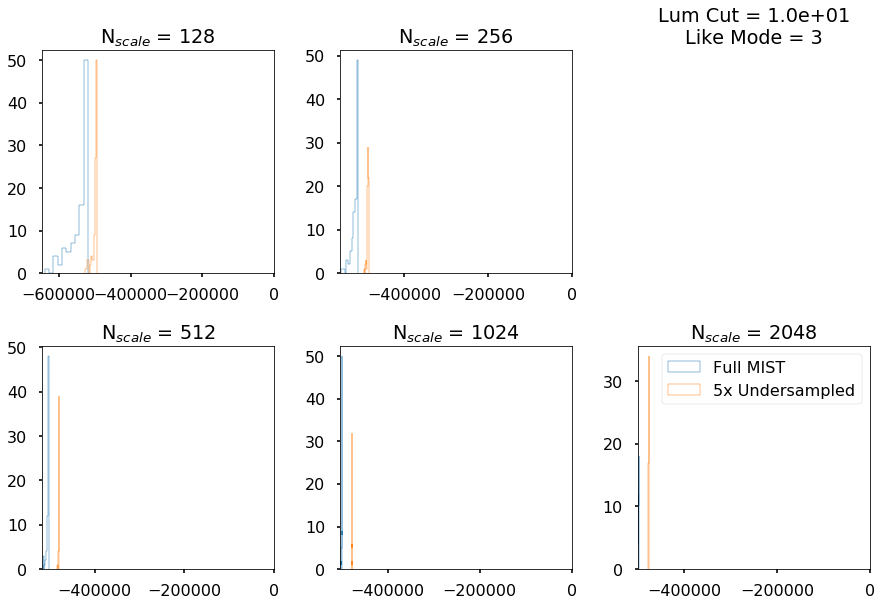

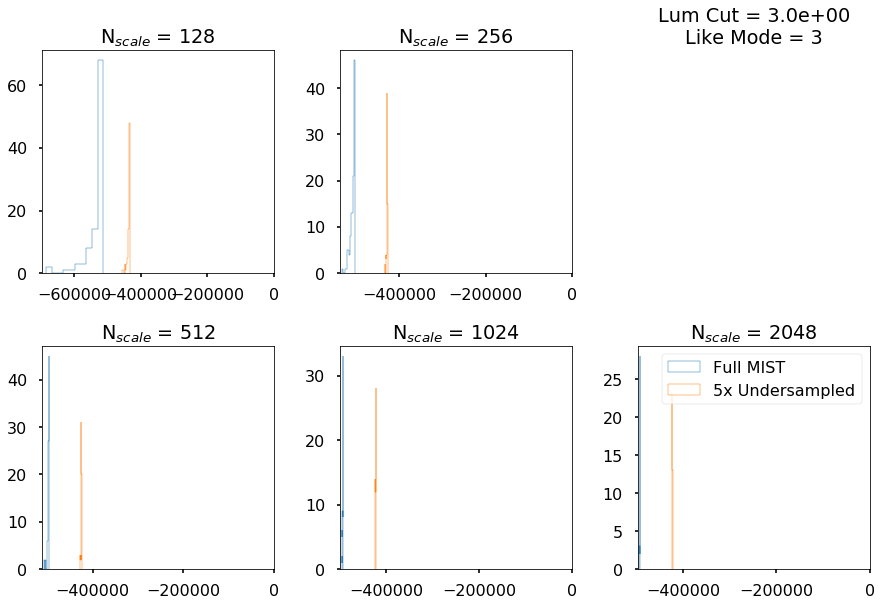

In [25]:
lm = 0
rc = 0.0
for lm in [0,1,2,3]:
    for lc in df.lum_cut.unique():
        fig, axes = plt.subplots(nrows=2, ncols=3)
        axes = axes.flatten()
        axes[2].axis('off')
        axes[2].set_title('Lum Cut = %.1e\nLike Mode = %d'%(lc, lm))
        axes = np.delete(axes, 2)
        Ns = [128, 256, 512, 1024, 2048]
        for i in range(5):
            N = Ns[i]
            df_f = df[(df.N_scale==N) & (df.like_mode==lm) & (df.full_MIST) & (df.lum_cut==lc)]
            df_m = df[(df.N_scale==N) & (df.like_mode==lm) & (~df.full_MIST)& (df.lum_cut==lc)]
            axes[i].hist(df_f.log_like, histtype='step', label='Full MIST')
            axes[i].hist(df_m.log_like, histtype='step', label='5x Undersampled')
            axes[i].set_title(r'N$_{scale}$ = ' + '%d'%N)
            axes[i].set_xlim(xmax=0.)
            plt.legend()
        # plt.suptitle('Rare_Cut = %.1e'%rc)
        plt.tight_layout()

In [25]:
def frac_std(x):
    return np.std(x) / np.abs(np.mean(x))

In [22]:
df.columns

Index([u'N_scale', u'full_MIST', u'like_mode', u'log_like', u'lum_cut'], dtype='object')

In [165]:
sigs = df.groupby(['like_mode', 'full_MIST', 'N_scale', 'lum_cut']).agg(np.std)

In [166]:
sigs.head()

log_like
like_mode full_MIST N_scale lum_cut              
0         False     128     3.0       4110.711648
                            10.0      7008.934485
                            30.0      8323.116634
                            100.0     9879.618528
                            300.0    19455.540233

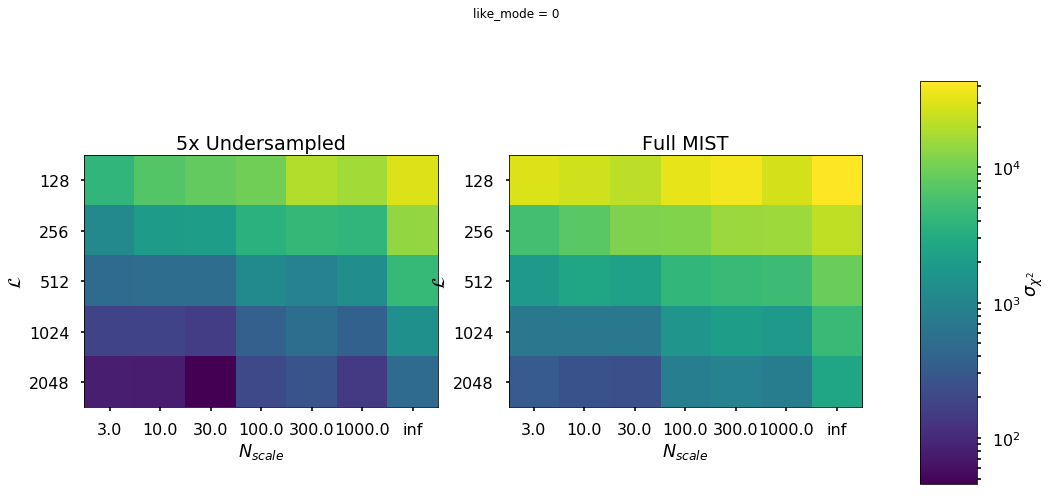

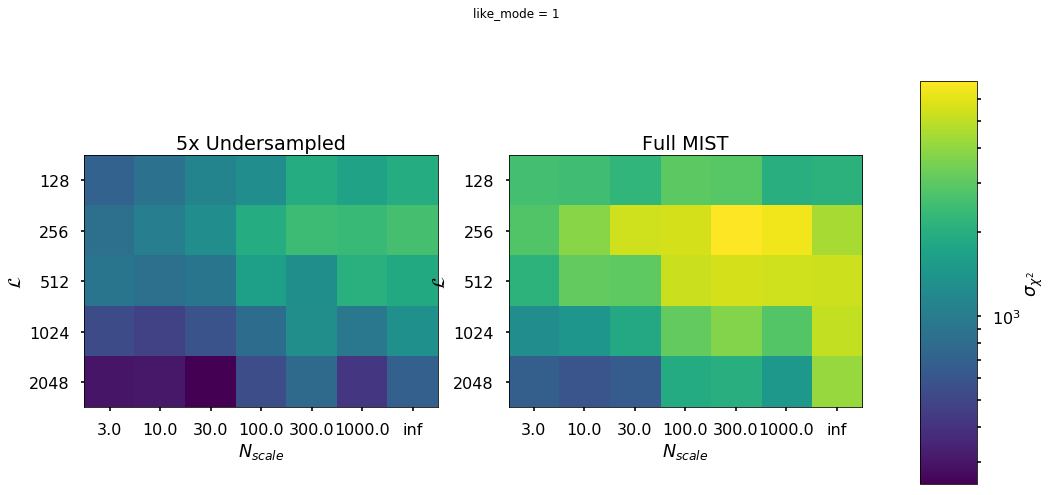

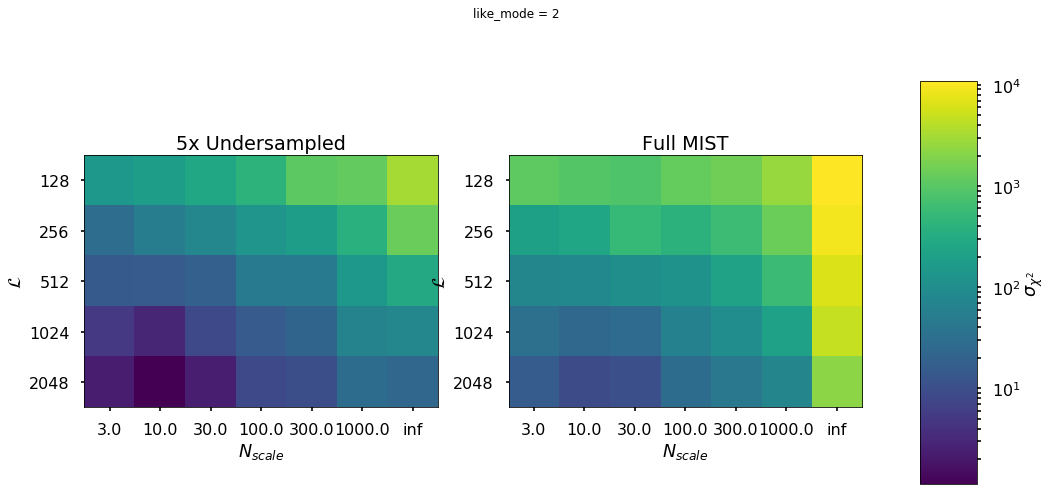

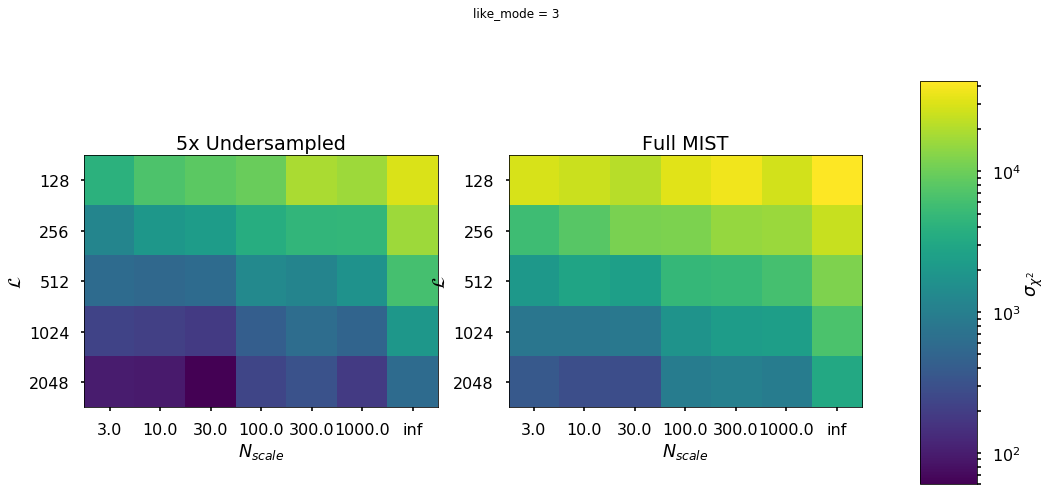

In [168]:
for l in [0, 1, 2, 3]:
    fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
    s = sigs.loc[l]
    n = mpl.colors.LogNorm(vmin=s.values.min(), vmax=s.values.max())
    for f in [False, True]:
        axis = axes[int(f)]
        s = sigs.loc[l].loc[f].log_like.unstack()
        plt.subplot(axis)
        im = plt.imshow(s, norm=n)
        axis.set_xlabel(r'$N_{scale}$')
        axis.set_ylabel(r'$\mathcal{L}$')
        axis.set_xticks(np.arange(0, 7))
        axis.set_yticks(np.arange(0,5))
        axis.set_xticklabels(s.columns.values)
        axis.set_yticklabels(s.index.values)
        if f:
            title = 'Full MIST'
        else:
            title = '5x Undersampled'
        axis.set_title(title)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    plt.colorbar(im,label=r'$\sigma_{\chi^2}$', cax=cbar_ax)
    fig.suptitle('like_mode = %d'%l)
#     fig.tight_layout()

In [33]:
from pcmdpy import instrument as ins, isochrones as iso

In [1]:
import pcmdpy

GPU acceleration not available, sorry
pycuda not installed.


In [3]:
f = pcmdpy.driver

In [35]:
pcmdpy.isochrones

<module 'pcmdpy.isochrones' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/isochrones.py'>

In [7]:
reload(driver)

<module 'pcmdpy.driver' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/driver.py'>

In [8]:
f = [instrument.Filter.HST_F475W(1.0), instrument.Filter.HST_F814W(1.0)]
iso_model = isochrones.Isochrone_Model(f)

In [9]:
d = driver.Driver(iso_model, gpu=False)

In [10]:
g = galaxy.Galaxy_SSP([-0.5, -2., 1.5, 9.6])

In [13]:
mags, _ = d.simulate(g, 128, psf=True)
pcmd = utils.make_pcmd(mags)
d.initialize_data(pcmd)

In [17]:
mags, _ = d.simulate(g, 512, psf=True)
pcmd = utils.make_pcmd(mags)
d.loglike(pcmd, like_mode=2) - d.loglike(pcmd, like_mode=1)

(-3.4312181648762485, -3.4282671255397443)
(-1.3840058439871177, -1.3410190754317584)


-0.41311561999441437

In [3]:
df = pd.DataFrame()

In [4]:
df['a'] = [np.array([5.3, 2.3]), np.array([2., 1., 2.])]

In [5]:
df

,a
0,"[5.3, 2.3]"
1,"[2.0, 1.0, 2.0]"


In [6]:
df.to_csv('/Users/bcook/test.csv')

In [7]:
df = pd.read_csv('/Users/bcook/test.csv')

In [8]:
df

,Unnamed: 0,a
0,0,[ 5.3 2.3]
1,1,[ 2. 1. 2.]


In [13]:
df = pd.DataFrame(columns=np.array(['a','b','c']))

In [14]:
df

,a,b,c


In [ ]:
df.

In [3]:
import pcmdpy as ppy

In [4]:
ppy.galaxy

<module 'pcmdpy.galaxy' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/galaxy.pyc'>

In [5]:
g = ppy.galaxy.Galaxy_SSP([-2., -2., -2., -2.])

In [9]:
isinstance(g, ppy.galaxy.Galaxy_SSP)

True

In [10]:
type(g) is ppy.galaxy.Galaxy_SSP

False

In [18]:
g

<pcmdpy.galaxy.Galaxy_SSP instance at 0x116ca6320>

In [20]:
g

<pcmdpy.galaxy.Galaxy_SSP instance at 0x116ca6320>

In [21]:
g.hello = 5

In [37]:
a = np.random.random(8)

In [34]:
a += np.random.normal(loc=0, scale=0.1, size=8)

In [35]:
a

array([ 0.83985593,  0.52538416, -0.06686009,  0.2330361 ,  0.5042694 ,
        1.00288295,  0.92640332,  0.15038124])

In [39]:
a[a<0.] = 0.

In [42]:
r = np.random.RandomState(seed=0)

In [43]:
r.normal(loc=a, scale=0.02)

array([ 0.70136375,  0.25311732,  0.85184556,  0.79474217,  0.45851723,
        0.40350818,  0.36825746,  0.89403502])

In [45]:
f = g.hello

In [46]:
f += 1

In [47]:
g.hello

5

In [48]:
f

6